In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from base_data_handler import BaseDataHandler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target column (species)
df['target'] = iris.target

# Optional: map target numbers to species names
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))

df = df.drop(columns=['target'])

In [10]:
handler = BaseDataHandler(df=df)
handler.try_clean_column_names()

(True, None)

In [11]:
handler.print_dataframe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


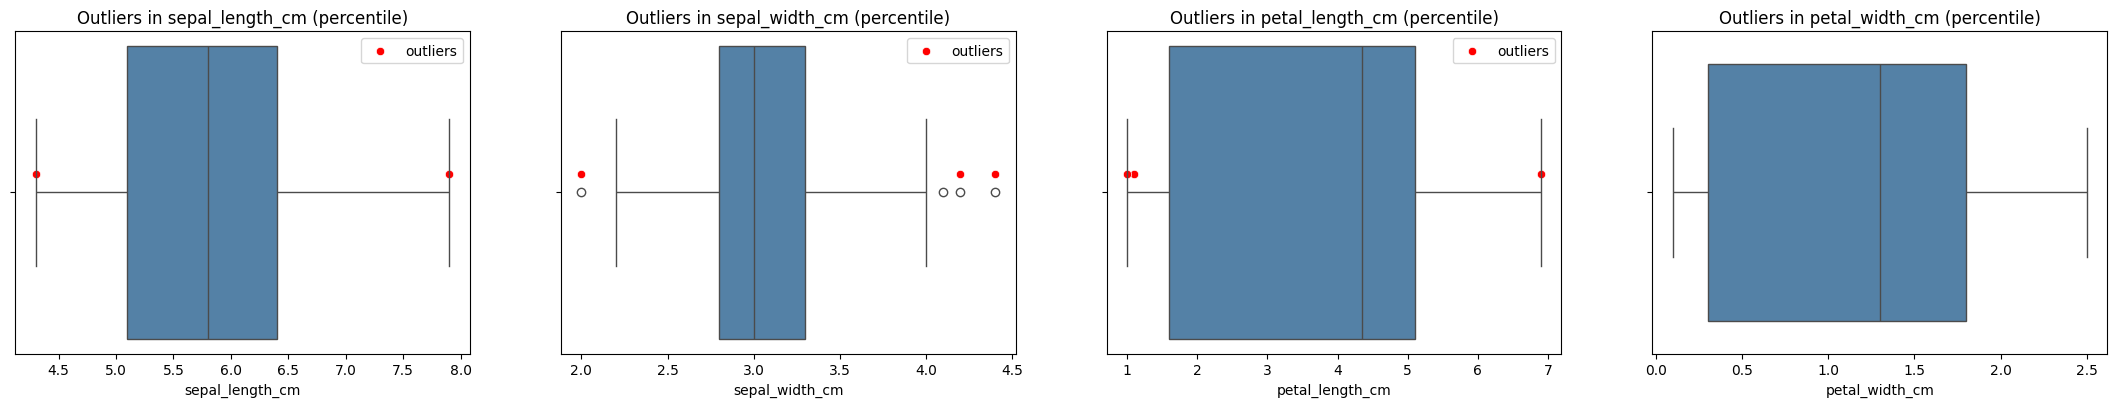

In [12]:
fig, axes = handler.get_outlier_case_study(cols=4, width_mul=1.5)

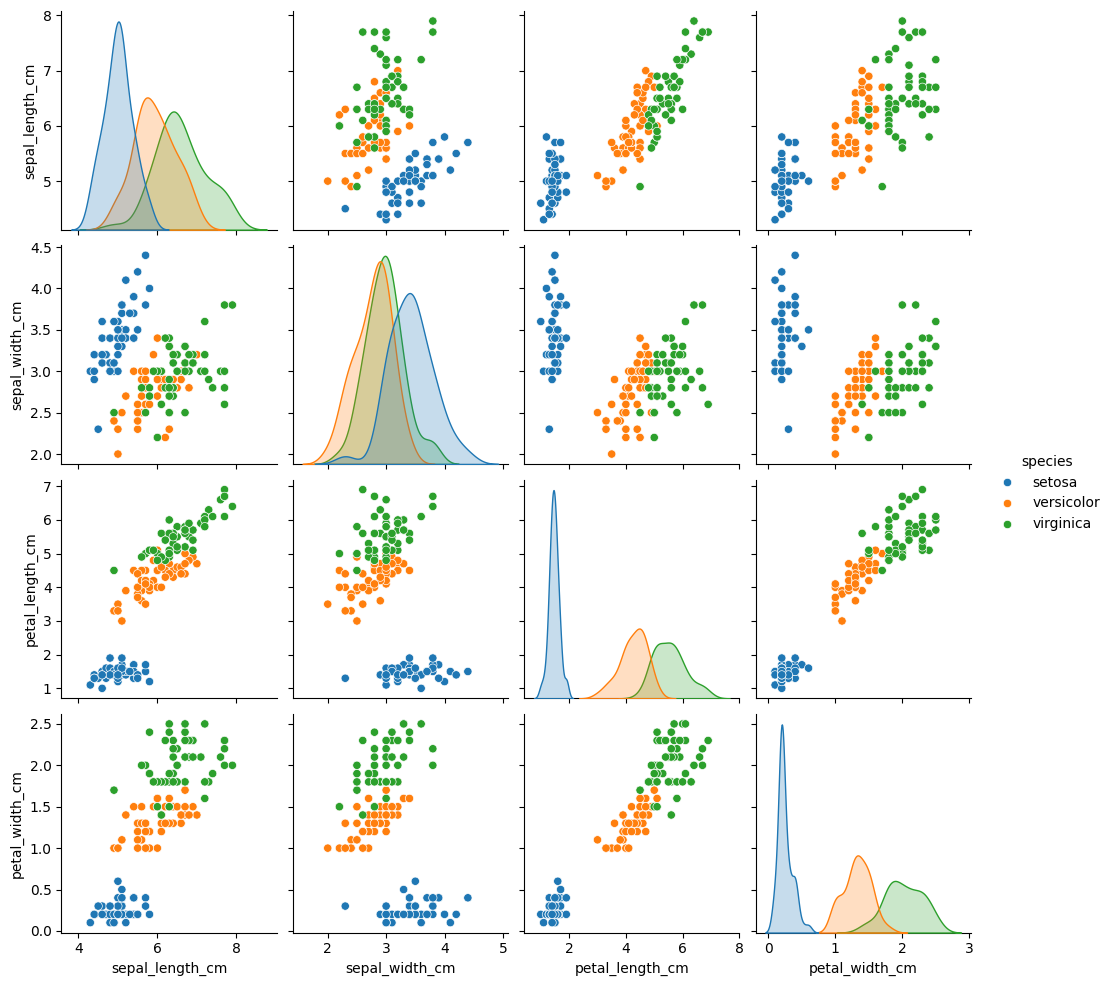

In [13]:
sns.pairplot(handler.df, hue="species")
plt.show()

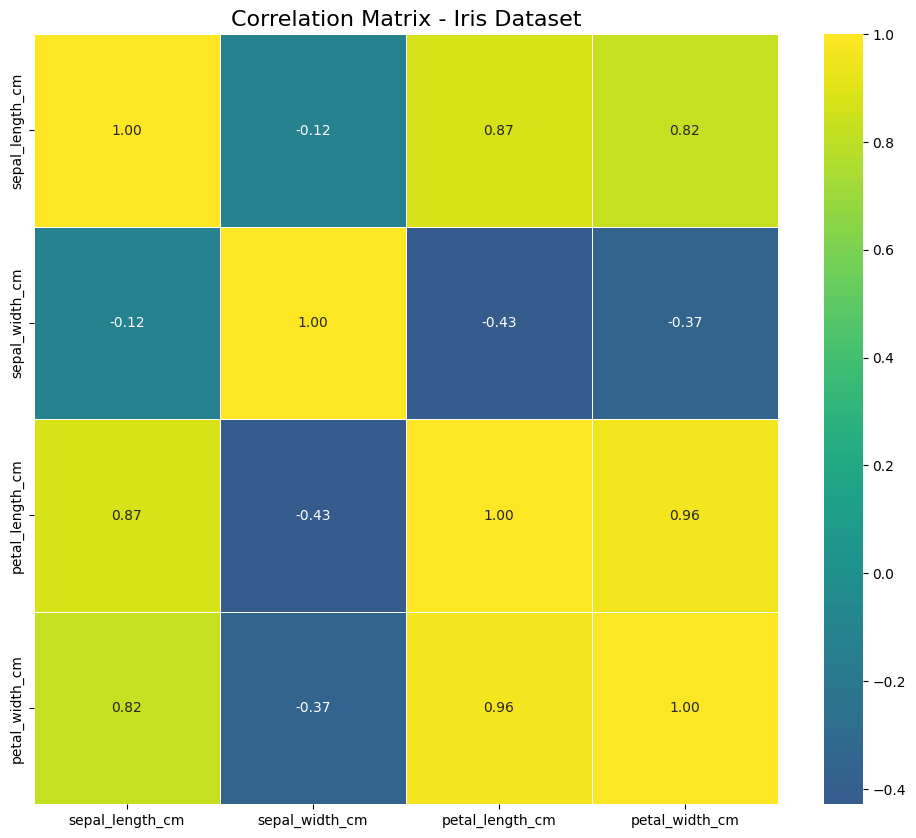

In [14]:
corr_matrix = handler.try_get_numeric_cols().corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='viridis', 
            center=0, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f")

plt.title('Correlation Matrix - Iris Dataset', fontsize=16)
plt.show()

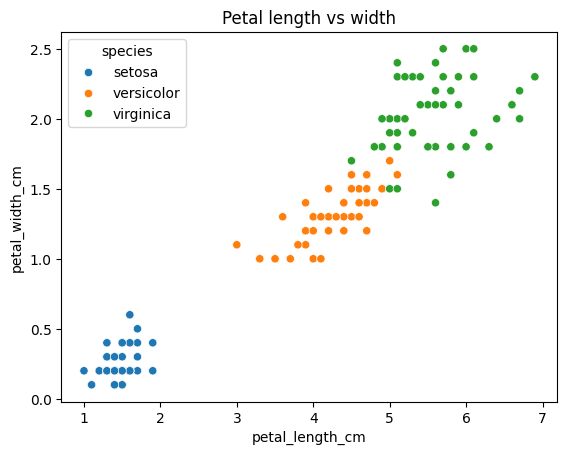

In [15]:
sns.scatterplot(data=handler.df, x="petal_length_cm", y="petal_width_cm", hue="species")
plt.title("Petal length vs width")
plt.show()


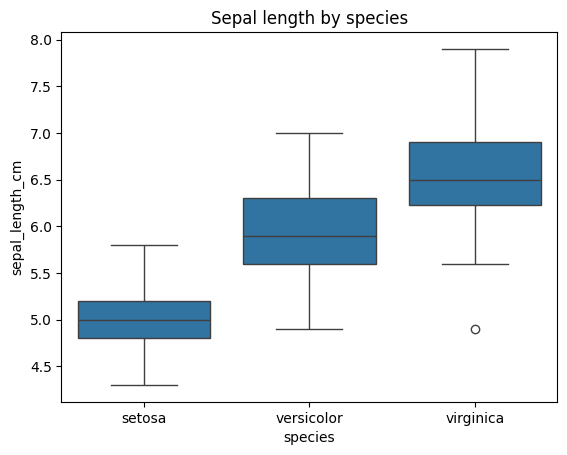

In [17]:
sns.boxplot(data=handler.df, x="species", y="sepal_length_cm")
plt.title("Sepal length by species")
plt.show()
